# PROBLEM STATEMENT

1. Customer Churn is very important for every buisness. In banking sector, loosing a cusotmer is a crucial one, which defenitely affect the turn over of the branch.
2. The problem statement is to find the factors affecting the customer churn.
3. If the customer is closing the bank account , what will be the reasons.
4. Model have to build for analyisng if the customer discontinues the bank.


# DATA SET

https://www.kaggle.com/shubh0799/churn-modelling

# DATA SET DESCRIPTION

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. 

 RowNumber: Row Numbers from 1 to 10000 

 CustomerId: Unique Ids for bank customer identification 

 Surname: Customer's last name 

 CreditScore: Credit score of the customer 

 Geography: The country from which the customer belongs 

 Gender: Male or Female 

 Age: Age of the customer 

 Tenure: Number of years for which the customer has been with the bank 

 Balance: Bank balance of the customer 

 NumOfProducts: Number of bank products the customer is utilising 

 HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not 

 IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not 

 EstimatedSalary: Estimated salary of the customer in Dollars 

 Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained 

 > Target Column Description: Exited is a class label used to divide into groups (customer closed account or not). 

# IMPORT REQUIRED LIBRARIES

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image  
sns.set_palette("pink")
sns.set_style("darkgrid")
from scipy.stats import mannwhitneyu
from prettytable import PrettyTable
import scipy
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv("Churn.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1


# EXPLORATORY DATA ANALYSIS

In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [6]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
df["HasCrCard"]=df["HasCrCard"].astype("object")
df["IsActiveMember"]=df["IsActiveMember"].astype("object")

In [10]:
df.drop("Exited",axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


<AxesSubplot:xlabel='mean'>

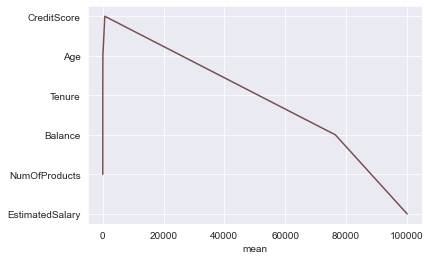

In [11]:
sns.lineplot(df.drop("Exited",axis=1).describe().T["mean"],df.drop("Exited",axis=1).describe().T.index)

* Clearly The continous columns are in different scale, With respect to algorithm, if there any feature engineering required will do in model fine tuning.

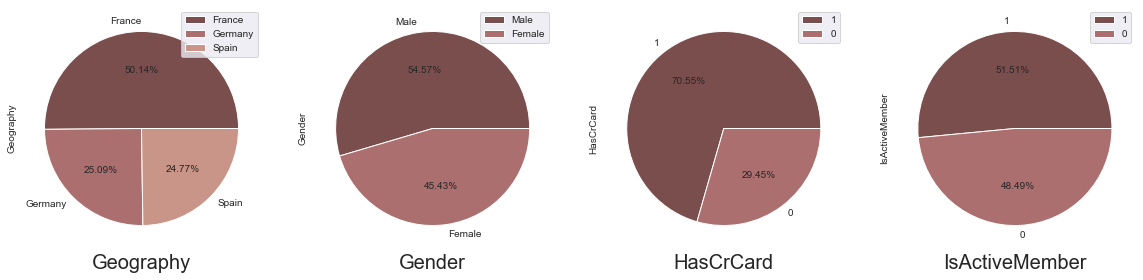

In [22]:
#c
x = 5  # number of rows
y = 4  # number of columns
z = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 110))

for i in df.select_dtypes(object).columns:
    plt.subplot(x, y, z)
    plt.xlabel(i)
    df[i].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
    plt.legend()
    plt.xlabel(i,size=20)
    plt.xticks(rotation=90)
    z = z + 1

plt.show()

In [29]:
t = PrettyTable(['Column Name', 'P Values', 'Interpretation'])
for col in df.select_dtypes(np.object).columns :
    tab = pd.crosstab(df[col],df['Exited'],margins = False)
    stat, p, dof, expected = scipy.stats.chi2_contingency(tab)
    if p<0.05:
        cm = 'Significant'
    else:
        cm = 'Not Significant'
    t.add_row([col,p,cm ])
print(t)

+----------------+------------------------+-----------------+
|  Column Name   |        P Values        |  Interpretation |
+----------------+------------------------+-----------------+
|   Geography    | 3.8303176053541544e-66 |   Significant   |
|     Gender     | 2.2482100097131755e-26 |   Significant   |
|   HasCrCard    |  0.49237236141554686   | Not Significant |
| IsActiveMember | 8.785858269303703e-55  |   Significant   |
+----------------+------------------------+-----------------+


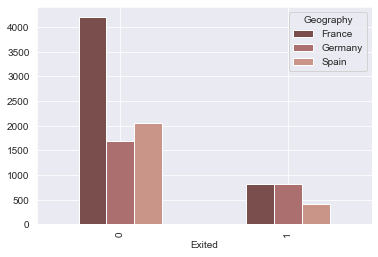

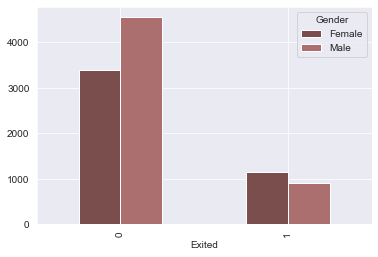

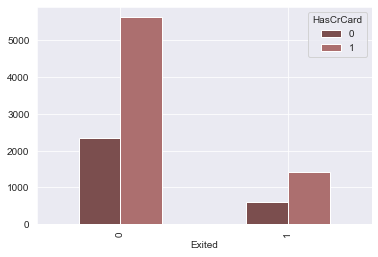

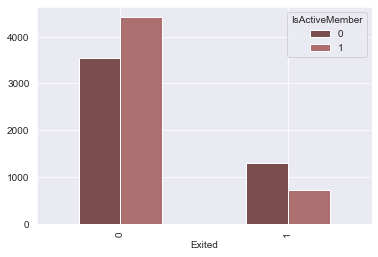

In [30]:
j=1
for i in df.select_dtypes(object).columns:
    
    pd.crosstab(df["Exited"],df[i]).plot(kind="bar")
    
    plt.show()

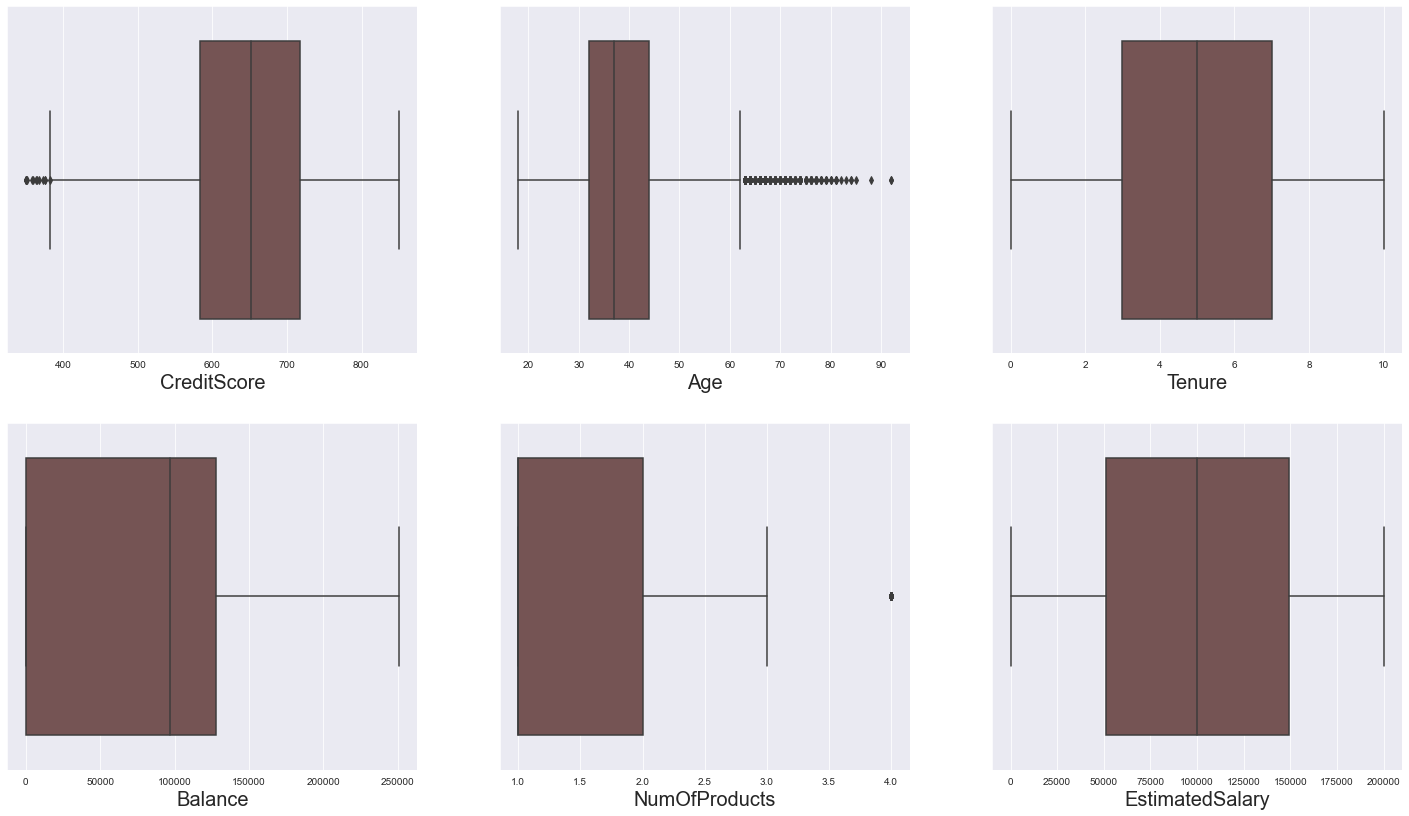

In [24]:

x = 8  # number of rows
y = 3  # number of columns
z = 1  # initialize plot counter

fig = plt.figure(figsize=(25, 60))

for i in df.select_dtypes(np.number).drop("Exited",axis=1).columns:
    plt.subplot(x, y, z)
    plt.xlabel(i,size=20)
    sns.boxplot(df[i])
    z = z + 1

plt.show()

In [28]:
t = PrettyTable(['Column Name', 'P Values', 'Interpretation'])
for col in df.select_dtypes(np.number).drop("Exited",axis=1).columns :
    stat,pval=mannwhitneyu(df[col],df[i])
    if pval<0.05:
        cm = 'Significant'
    else:
        cm = 'Not Significant'
    t.add_row([col,pval,cm ])
print(t)

+-----------------+------------------------+-----------------+
|   Column Name   |        P Values        |  Interpretation |
+-----------------+------------------------+-----------------+
|   CreditScore   |          0.0           |   Significant   |
|       Age       |          0.0           |   Significant   |
|      Tenure     |          0.0           |   Significant   |
|     Balance     | 4.074930000737337e-182 |   Significant   |
|  NumOfProducts  |          0.0           |   Significant   |
| EstimatedSalary |   0.4999995114097009   | Not Significant |
+-----------------+------------------------+-----------------+


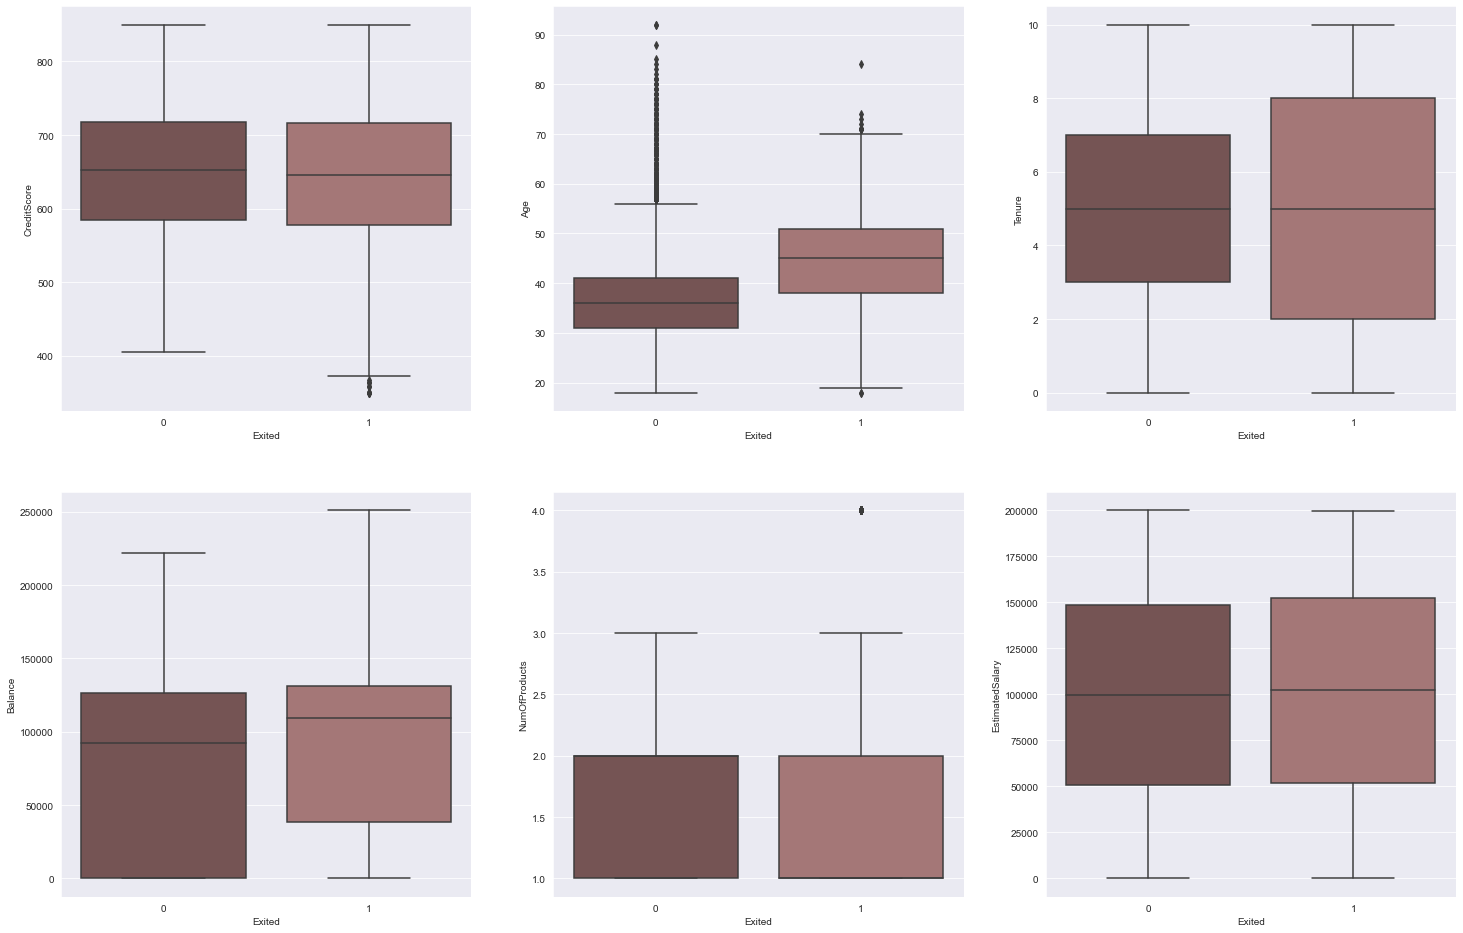

In [32]:
x = 8  # number of rows
y = 3  # number of columns
z = 1  # initialize plot counter

fig = plt.figure(figsize=(25, 70))

for i in df.select_dtypes(np.number).drop("Exited",axis=1).columns:
    plt.subplot(x, y, z)
    plt.xlabel(i)
    sns.boxplot(df["Exited"],df[i])
    z = z + 1

plt.show()

<AxesSubplot:ylabel='Exited'>

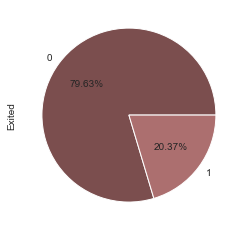

In [33]:
df.Exited.value_counts().plot(kind="pie",autopct="%0.02f%%")

* There is Data Imbalance in target Variable

# MODEL BUILDING

In [48]:
df_feature=df.drop("Exited",axis=1)
df_target=df.Exited
df_num=df_feature.select_dtypes(np.number)
df_cat=df_feature.select_dtypes(object)
dummied=pd.get_dummies(df_cat,drop_first=True)
df_feature=pd.concat([df_num,dummied],axis=1)
smote = SMOTE(sampling_strategy=0.3)
x_sm,y_sm = smote.fit_resample(df_feature,df_target)
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.3,random_state=10)

In [49]:
rf=RandomForestClassifier()
rf.fit(x_sm,y_sm)
ytestpred=rf.predict(xtest)
print(classification_report(ytest,ytestpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2380
           1       1.00      1.00      1.00       726

    accuracy                           1.00      3106
   macro avg       1.00      1.00      1.00      3106
weighted avg       1.00      1.00      1.00      3106



In [46]:
ytrainpred=rf.predict(xtrain)

In [47]:
print(classification_report(ytrain,ytrainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5590
           1       1.00      1.00      1.00      2213

    accuracy                           1.00      7803
   macro avg       1.00      1.00      1.00      7803
weighted avg       1.00      1.00      1.00      7803



In [53]:
imp=pd.DataFrame({"Columns":xtrain.columns,"Importance":rf.feature_importances_}).sort_values(by="Importance")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Geography_Spain'),
  Text(1, 0, 'HasCrCard_1'),
  Text(2, 0, 'Gender_Male'),
  Text(3, 0, 'Geography_Germany'),
  Text(4, 0, 'IsActiveMember_1'),
  Text(5, 0, 'Tenure'),
  Text(6, 0, 'NumOfProducts'),
  Text(7, 0, 'CreditScore'),
  Text(8, 0, 'Balance'),
  Text(9, 0, 'EstimatedSalary'),
  Text(10, 0, 'Age')])

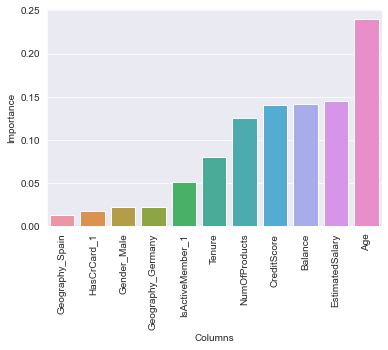

In [54]:
sns.barplot(imp["Columns"],imp["Importance"])
plt.xticks(rotation=90)

# CONCLUSION

1. Target Column Data is imbalnce in nature.
2. Smote Over Sampling Method is applied to get balance in data.
3. Random Forest is giving best Result of prediction which Customer left the bank.